#### ¿Qué es "Photometric Interpretation"?

MONOCHROME1: Los valores bajos en la imagen (más oscuros) se interpretan como blanco, y los valores altos (más claros) se interpretan como negro.

MONOCHROME2: Los valores bajos en la imagen (más oscuros) se interpretan como negro, y los valores altos (más claros) se interpretan como blanco.

Por lo tanto, si cambias de MONOCHROME1 a MONOCHROME2 o viceversa, se invierte la escala de grises de la imagen.

#### Dado el CSV Filtrado con Masas y Calcificaciones. Análizamos los que tengan interpretación fotométrica con Monochrome  1 y 2

Total de imágenes con MONOCHROME1: 232
Total de imágenes con MONOCHROME2: 1293
Mostrando imagen con Photometric Interpretation: MONOCHROME1, SOP Instance UID: f7cdf7b22955e66d34cc1efccdab5fbf


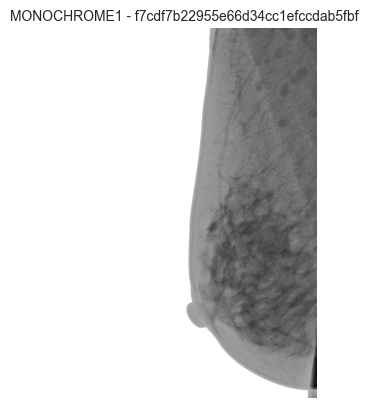

Mostrando imagen con Photometric Interpretation: MONOCHROME2, SOP Instance UID: cd3f65e401f72d414d3954a677d20c3f


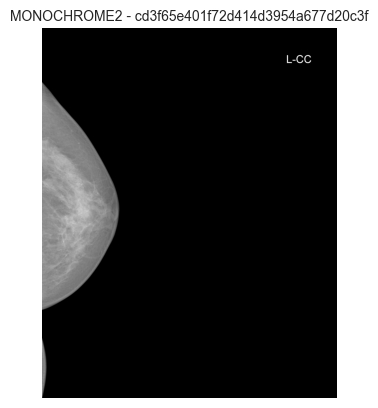

In [74]:
import os
import random
import pandas as pd
import pydicom
import matplotlib.pyplot as plt

# Ruta al CSV filtrado
filtered_csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/filtered_mass_calcifications.csv'

# Ruta a la carpeta de imágenes DICOM
dicom_root = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/original/Vindrmammo/images'

# Cargar el CSV filtrado
filtered_df = pd.read_csv(filtered_csv_path)

# Función para obtener la ruta del archivo DICOM usando SOP Instance UID
def get_dicom_path(sop_instance_uid):
    for study_id in os.listdir(dicom_root):
        study_path = os.path.join(dicom_root, study_id)
        if os.path.isdir(study_path):
            dicom_path = os.path.join(study_path, sop_instance_uid + '.dicom')
            if os.path.exists(dicom_path):
                return dicom_path
    raise FileNotFoundError(f"No se encontró el archivo DICOM para SOP Instance UID: {sop_instance_uid}")

# Función para mostrar una imagen DICOM
def show_dicom_image(dicom_path, title):
    dicom = pydicom.dcmread(dicom_path)
    image = dicom.pixel_array
    
    # Mostrar la imagen
    plt.imshow(image, cmap='gray')
    plt.title(title, fontsize=10)
    plt.axis('off')
    plt.show()

# Filtrar las imágenes por "Photometric Interpretation"
monochrome1_df = filtered_df[filtered_df['Photometric Interpretation'] == 'MONOCHROME1']
monochrome2_df = filtered_df[filtered_df['Photometric Interpretation'] == 'MONOCHROME2']

# Imprimir el total de cada valor
print(f"Total de imágenes con MONOCHROME1: {len(monochrome1_df)}")
print(f"Total de imágenes con MONOCHROME2: {len(monochrome2_df)}")

# Seleccionar una imagen al azar de cada tipo
monochrome1_row = monochrome1_df.sample(1).iloc[0]
monochrome2_row = monochrome2_df.sample(1).iloc[0]

# Obtener los SOP Instance UID correspondientes
monochrome1_sop_uid = monochrome1_row['SOP Instance UID']
monochrome2_sop_uid = monochrome2_row['SOP Instance UID']

# Obtener las rutas DICOM para las imágenes seleccionadas
monochrome1_dicom_path = get_dicom_path(monochrome1_sop_uid)
monochrome2_dicom_path = get_dicom_path(monochrome2_sop_uid)

# Mostrar las dos imágenes DICOM
print(f"Mostrando imagen con Photometric Interpretation: MONOCHROME1, SOP Instance UID: {monochrome1_sop_uid}")
show_dicom_image(monochrome1_dicom_path, f"MONOCHROME1 - {monochrome1_sop_uid}")

print(f"Mostrando imagen con Photometric Interpretation: MONOCHROME2, SOP Instance UID: {monochrome2_sop_uid}")
show_dicom_image(monochrome2_dicom_path, f"MONOCHROME2 - {monochrome2_sop_uid}")


### Ahora vamos a visualizar una imágen en Monochrome 2 a Monochrome1, la idea es dejarlas todas en el mismo formato.

Mostrando imagen aleatoria en MONOCHROME2: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/original/Vindrmammo/images/1560345de7d8277b170ca3842eae6c97/e751e5a947089704457741eea74c2280.dicom


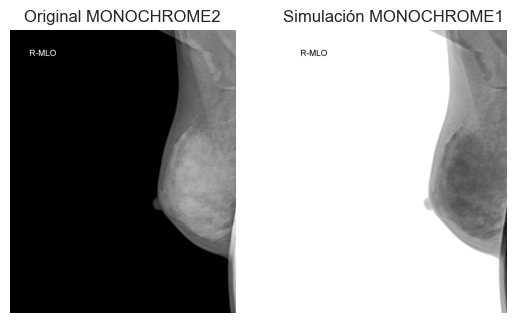

In [67]:
 import os
import random
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# Ruta al directorio donde se almacenan las imágenes DICOM
dicom_root = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/original/Vindrmammo/images'
# Ruta al CSV filtrado
filtered_csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/filtered_mass_calcifications.csv'

# Cargar el CSV filtrado
filtered_csv = pd.read_csv(filtered_csv_path)

# Función para obtener la ruta DICOM usando el SOP Instance UID
def get_dicom_path_from_sop(sop_uid):
    for study_id in os.listdir(dicom_root):
        study_path = os.path.join(dicom_root, study_id)
        if os.path.isdir(study_path):
            dicom_path = os.path.join(study_path, sop_uid + '.dicom')
            if os.path.exists(dicom_path):
                return dicom_path
    raise FileNotFoundError(f"No se encontró el archivo DICOM para SOP Instance UID: {sop_uid}")

# Función para buscar y cargar una imagen aleatoria en MONOCHROME2 que también esté en el CSV filtrado
def find_random_monochrome2_image_from_csv():
    monochrome2_images = []  # Lista para almacenar rutas de imágenes MONOCHROME2

    # Recorrer las filas del CSV filtrado
    for _, row in filtered_csv.iterrows():
        sop_uid = row['SOP Instance UID']  # Usar la columna 'SOP Instance UID' del CSV para buscar la imagen
        try:
            dicom_path = get_dicom_path_from_sop(sop_uid)
            dicom = pydicom.dcmread(dicom_path)

            # Verificar si la imagen está en MONOCHROME2
            if dicom.PhotometricInterpretation == 'MONOCHROME2':
                monochrome2_images.append(dicom_path)
        except FileNotFoundError:
            print(f"Archivo DICOM no encontrado para SOP Instance UID: {sop_uid}")

    # Seleccionar una imagen aleatoria de la lista
    if monochrome2_images:
        random_image_path = random.choice(monochrome2_images)
        dicom = pydicom.dcmread(random_image_path)
        return random_image_path, dicom
    else:
        raise ValueError("No se encontraron imágenes en MONOCHROME2 en el CSV filtrado.")

# Función para mostrar la imagen en formato original y luego invertida
def show_image_monochrome_comparison(dicom):
    # Extraer la imagen DICOM
    img = dicom.pixel_array
    
    # Mostrar la imagen original en MONOCHROME2
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original MONOCHROME2')
    plt.axis('off')

    # Invertir la imagen para simular MONOCHROME1
    img_inverted = np.max(img) - img

    # Mostrar la imagen invertida en MONOCHROME1
    plt.subplot(1, 2, 2)
    plt.imshow(img_inverted, cmap='gray')
    plt.title('Simulación MONOCHROME1')
    plt.axis('off')

    # Mostrar ambas imágenes
    plt.show()

# Buscar una imagen aleatoria en MONOCHROME2 que esté en el CSV filtrado
dicom_path, dicom = find_random_monochrome2_image_from_csv()

# Mostrar la imagen en ambos formatos
print(f"Mostrando imagen aleatoria en MONOCHROME2: {dicom_path}")
show_image_monochrome_comparison(dicom)


#### Vamos a analizar ahora la columna "Window Center & Width Explanation"

### 1. linear LUT


El término "linear LUT" se refiere a una Look-Up Table (LUT) lineal, una técnica utilizada para ajustar el contraste de una imagen DICOM. En este caso, la transformación es lineal, lo que significa que los valores de los píxeles de la imagen se transforman proporcionalmente dentro de los límites especificados por el Window Center y el Window Width.

Window Center: Define el valor medio en la escala de grises alrededor del cual se ajustan los niveles de gris.
Window Width: Establece el rango de valores de gris que se representan en la imagen, controlando el contraste.
En imágenes con linear LUT, los píxeles se mapean linealmente desde el rango de Window Width a la escala de grises entre 0 y 255 (negro a blanco).

### 2. ['CURRENT', 'STANDARD', 'CONTRAST', 'SMOOTH', 'CUSTOM']
Esta opción indica un conjunto de configuraciones predefinidas o personalizadas para ajustar la visualización de la imagen. Los términos representan diferentes ajustes de visualización, los cuales pueden seleccionarse en el software que visualiza las imágenes DICOM.

CURRENT: La configuración que se está utilizando en ese momento, basada en los ajustes del visor.
STANDARD: Una configuración estándar que probablemente utilice un rango de Window Center y Window Width adecuados para un tipo común de imagen (mamografía, por ejemplo).
CONTRAST: Puede ser una configuración que optimiza la imagen para maximizar el contraste.
SMOOTH: Puede aplicar un filtrado o suavizado a la imagen para reducir ruido o mejorar la calidad visual.
CUSTOM: Configuraciones personalizadas establecidas por el radiólogo o el software según las necesidades del usuario.
Este conjunto de opciones ofrece flexibilidad al radiólogo para visualizar la imagen de acuerdo con diferentes criterios, destacando detalles específicos como el contraste o suavizando la imagen para una mejor interpretación.

### 3. Default W/L (Window Level & Width)
El "Default W/L" (Window Level y Window Width por defecto) es una configuración predeterminada para la visualización de imágenes. Los valores de Window Center y Window Width suelen ser establecidos por el dispositivo de adquisición de la imagen o por el estándar DICOM, y están diseñados para proporcionar una visualización "general" que funcione en la mayoría de los casos.

Window Center (Nivel de ventana): Define el valor alrededor del cual se distribuyen los niveles de gris.
Window Width (Ancho de ventana): Determina la amplitud del rango de niveles de gris que se utilizan para representar la imagen.
En Default W/L, se utilizan valores que intentan ser adecuados para la mayoría de las visualizaciones sin ajustes adicionales personalizados o específicos. Este ajuste puede ser más genérico, pero asegura que las imágenes se vean "bien" sin necesidad de cambios manuales.



In [56]:
import pandas as pd

# Ruta al CSV filtrado
filtered_csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/filtered_mass_calcifications.csv'

# Cargar el CSV filtrado
filtered_csv = pd.read_csv(filtered_csv_path)

# Verificar si la columna "Window Center & Width Explanation" existe en el CSV
if 'Window Center & Width Explanation' in filtered_csv.columns:
    # Obtener la distribución de valores de la columna
    value_counts = filtered_csv['Window Center & Width Explanation'].value_counts()

    # Mostrar la distribución de valores
    print("Distribución de valores en la columna 'Window Center & Width Explanation':")
    print(value_counts)
else:
    print("La columna 'Window Center & Width Explanation' no se encuentra en el CSV.")


Distribución de valores en la columna 'Window Center & Width Explanation':
Window Center & Width Explanation
linear LUT                                                 1007
['CURRENT', 'STANDARD', 'CONTRAST', 'SMOOTH', 'CUSTOM']     286
Default W/L                                                 232
Name: count, dtype: int64


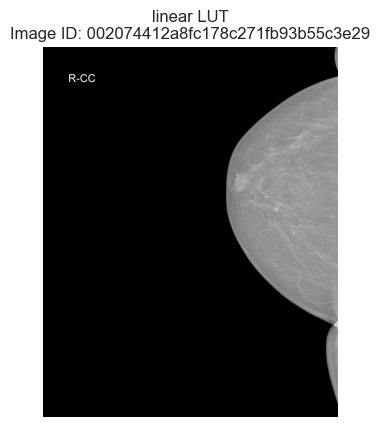

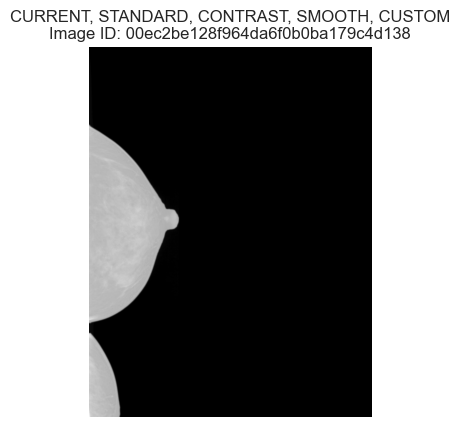

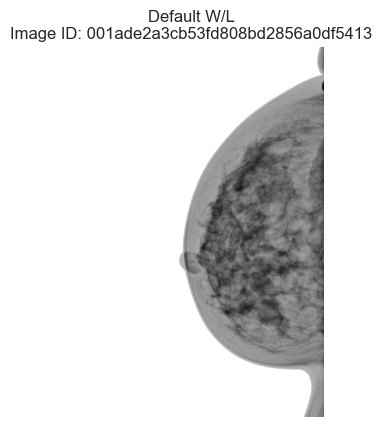

In [57]:
import os
import pydicom
import matplotlib.pyplot as plt
import pandas as pd

# Ruta al CSV filtrado
filtered_csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/filtered_mass_calcifications.csv'

# Ruta a las imágenes DICOM
dicom_root = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/original/Vindrmammo/images'

# Cargar el CSV filtrado
filtered_csv = pd.read_csv(filtered_csv_path)

# Función para obtener la ruta del archivo DICOM usando image_id
def get_dicom_path(image_id):
    for study_id in os.listdir(dicom_root):
        study_path = os.path.join(dicom_root, study_id)
        if os.path.isdir(study_path):
            dicom_path = os.path.join(study_path, image_id + '.dicom')
            if os.path.exists(dicom_path):
                return dicom_path
    raise FileNotFoundError(f"No se encontró el archivo DICOM para image_id: {image_id}")

# Función para mostrar la imagen DICOM
def show_dicom_image(image_id, title):
    dicom_path = get_dicom_path(image_id)
    dicom = pydicom.dcmread(dicom_path)
    img = dicom.pixel_array
    
    # Mostrar la imagen
    plt.imshow(img, cmap='gray')
    plt.title(f"{title}\nImage ID: {image_id}")
    plt.axis('off')
    plt.show()

# Filtrar por los diferentes valores de la columna "Window Center & Width Explanation"
linear_lut_df = filtered_csv[filtered_csv['Window Center & Width Explanation'] == 'linear LUT']
current_standard_df = filtered_csv[filtered_csv['Window Center & Width Explanation'] == "['CURRENT', 'STANDARD', 'CONTRAST', 'SMOOTH', 'CUSTOM']"]
default_wl_df = filtered_csv[filtered_csv['Window Center & Width Explanation'] == 'Default W/L']

# Seleccionar una imagen de cada tipo
linear_lut_image = linear_lut_df['SOP Instance UID'].iloc[0]
current_standard_image = current_standard_df['SOP Instance UID'].iloc[0]
default_wl_image = default_wl_df['SOP Instance UID'].iloc[0]

# Mostrar una imagen para cada valor
show_dicom_image(linear_lut_image, "linear LUT")
show_dicom_image(current_standard_image, "CURRENT, STANDARD, CONTRAST, SMOOTH, CUSTOM")
show_dicom_image(default_wl_image, "Default W/L")


### Ahora vamos a visualizar las 2 primeras configuraciones pasadas a Default

Visualizando imagen con 'linear LUT'


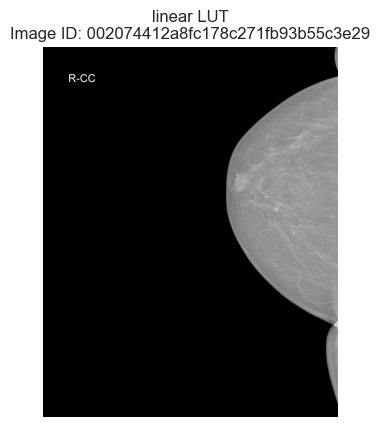

Visualizando imagen con 'CURRENT, STANDARD, CONTRAST, SMOOTH, CUSTOM'


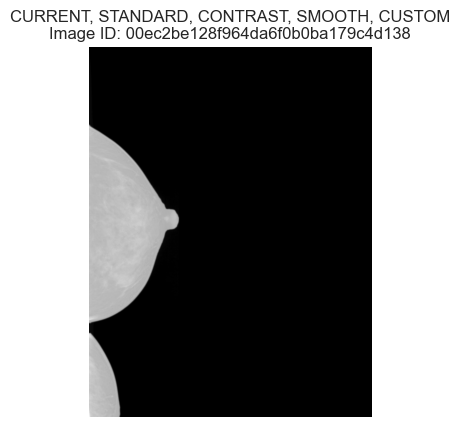

Convertir 'linear LUT' a 'Default W/L'


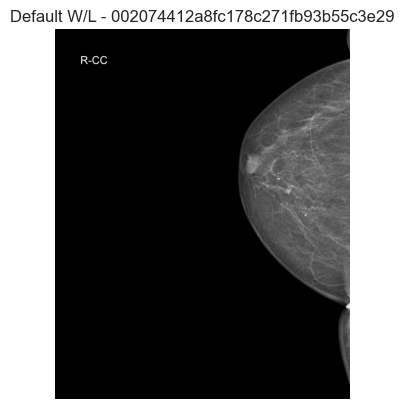

Convertir 'CURRENT, STANDARD, CONTRAST, SMOOTH, CUSTOM' a 'Default W/L'


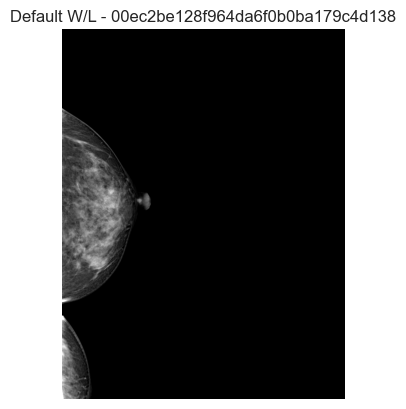

In [58]:
import os
import pydicom
import matplotlib.pyplot as plt
import pandas as pd
from pydicom.pixel_data_handlers.util import apply_voi_lut

# Ruta al CSV filtrado
filtered_csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/filtered_mass_calcifications.csv'

# Ruta a las imágenes DICOM
dicom_root = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/original/Vindrmammo/images'

# Cargar el CSV filtrado
filtered_csv = pd.read_csv(filtered_csv_path)

# Función para obtener la ruta del archivo DICOM usando image_id (SOP Instance UID)
def get_dicom_path(image_id):
    for study_id in os.listdir(dicom_root):
        study_path = os.path.join(dicom_root, study_id)
        if os.path.isdir(study_path):
            dicom_path = os.path.join(study_path, image_id + '.dicom')
            if os.path.exists(dicom_path):
                return dicom_path
    raise FileNotFoundError(f"No se encontró el archivo DICOM para image_id: {image_id}")

# Función para mostrar la imagen DICOM
def show_dicom_image(image_id, title):
    dicom_path = get_dicom_path(image_id)
    dicom = pydicom.dcmread(dicom_path)
    img = dicom.pixel_array
    
    # Mostrar la imagen
    plt.imshow(img, cmap='gray')
    plt.title(f"{title}\nImage ID: {image_id}")
    plt.axis('off')
    plt.show()

# Función para convertir a formato "Default W/L" (Windowing)
def convert_to_default_wl(image_id):
    dicom_path = get_dicom_path(image_id)
    dicom = pydicom.dcmread(dicom_path)

    # Aplicar VOI LUT con Window Center & Width de "Default W/L"
    window_center = dicom.WindowCenter if dicom.WindowCenter else 0#40  # Valores por defecto
    window_width = dicom.WindowWidth if dicom.WindowWidth else 0#400
    
    # Aplicar la transformación VOI LUT
    img_windowed = apply_voi_lut(dicom.pixel_array, dicom)
    
    # Mostrar la imagen transformada
    plt.imshow(img_windowed, cmap='gray')
    plt.title(f"Default W/L - {image_id}")
    plt.axis('off')
    plt.show()

# Filtrar por los diferentes valores de la columna "Window Center & Width Explanation"
linear_lut_df = filtered_csv[filtered_csv['Window Center & Width Explanation'] == 'linear LUT']
current_standard_df = filtered_csv[filtered_csv['Window Center & Width Explanation'] == "['CURRENT', 'STANDARD', 'CONTRAST', 'SMOOTH', 'CUSTOM']"]

# Seleccionar una imagen de cada tipo
linear_lut_image = linear_lut_df['SOP Instance UID'].iloc[0]
current_standard_image = current_standard_df['SOP Instance UID'].iloc[0]

# Mostrar una imagen con configuración "linear LUT"
print("Visualizando imagen con 'linear LUT'")
show_dicom_image(linear_lut_image, "linear LUT")

# Mostrar una imagen con configuración "['CURRENT', 'STANDARD', 'CONTRAST', 'SMOOTH', 'CUSTOM']"
print("Visualizando imagen con 'CURRENT, STANDARD, CONTRAST, SMOOTH, CUSTOM'")
show_dicom_image(current_standard_image, "CURRENT, STANDARD, CONTRAST, SMOOTH, CUSTOM")

# Convertir y mostrar las imágenes con la configuración "Default W/L"
print("Convertir 'linear LUT' a 'Default W/L'")
convert_to_default_wl(linear_lut_image)

print("Convertir 'CURRENT, STANDARD, CONTRAST, SMOOTH, CUSTOM' a 'Default W/L'")
convert_to_default_wl(current_standard_image)


### Vemos que en Default mejora los detalles, por lo tanto es el mejor valor que podemos manejar.

Visualizando imagen con 'linear LUT'


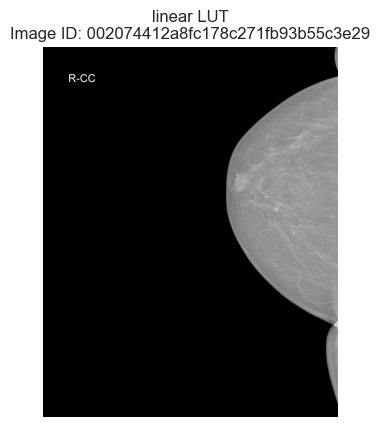

Visualizando imagen con 'CURRENT, STANDARD, CONTRAST, SMOOTH, CUSTOM'


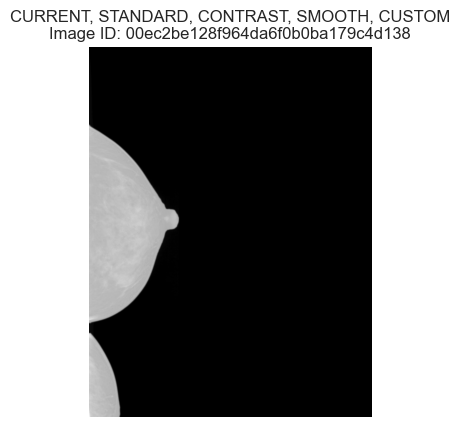

Convertir 'linear LUT' a 'Default W/L' con MONOCHROME1


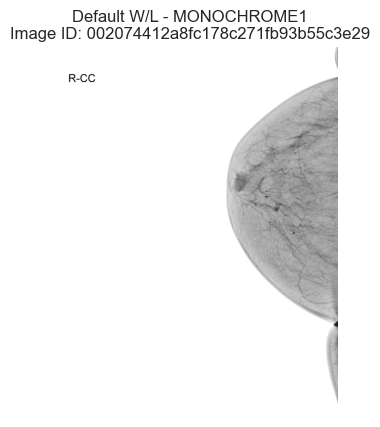

Convertir 'CURRENT, STANDARD, CONTRAST, SMOOTH, CUSTOM' a 'Default W/L' con MONOCHROME1


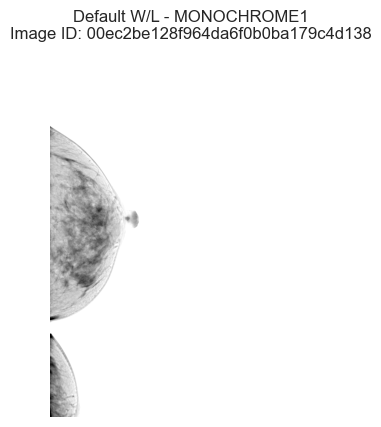

In [59]:
import os
import pydicom
import matplotlib.pyplot as plt
import pandas as pd
from pydicom.pixel_data_handlers.util import apply_voi_lut

# Ruta al CSV filtrado
filtered_csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/filtered_mass_calcifications.csv'

# Ruta a las imágenes DICOM
dicom_root = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/original/Vindrmammo/images'

# Cargar el CSV filtrado
filtered_csv = pd.read_csv(filtered_csv_path)

# Función para obtener la ruta del archivo DICOM usando image_id (SOP Instance UID)
def get_dicom_path(image_id):
    for study_id in os.listdir(dicom_root):
        study_path = os.path.join(dicom_root, study_id)
        if os.path.isdir(study_path):
            dicom_path = os.path.join(study_path, image_id + '.dicom')
            if os.path.exists(dicom_path):
                return dicom_path
    raise FileNotFoundError(f"No se encontró el archivo DICOM para image_id: {image_id}")

# Función para mostrar la imagen DICOM con título
def show_dicom_image(image_id, title):
    dicom_path = get_dicom_path(image_id)
    dicom = pydicom.dcmread(dicom_path)
    img = dicom.pixel_array
    
    # Mostrar la imagen
    plt.imshow(img, cmap='gray')
    plt.title(f"{title}\nImage ID: {image_id}")
    plt.axis('off')
    plt.show()

# Función para convertir a formato "Default W/L" (Windowing) y mostrar la imagen
def convert_to_default_wl(image_id, photometric_interpretation=None):
    dicom_path = get_dicom_path(image_id)
    dicom = pydicom.dcmread(dicom_path)

    # Cambiar el valor de Photometric Interpretation si se indica
    if photometric_interpretation:
        dicom.PhotometricInterpretation = photometric_interpretation

    # Aplicar VOI LUT con Window Center & Width de "Default W/L"
    window_center = dicom.WindowCenter if dicom.WindowCenter else 40  # Valores por defecto
    window_width = dicom.WindowWidth if dicom.WindowWidth else 400
    
    # Aplicar la transformación VOI LUT
    img_windowed = apply_voi_lut(dicom.pixel_array, dicom)
    
    # Si el Photometric Interpretation es MONOCHROME1, invertir la imagen
    if dicom.PhotometricInterpretation == 'MONOCHROME1':
        img_windowed = np.max(img_windowed) - img_windowed

    # Mostrar la imagen transformada
    plt.imshow(img_windowed, cmap='gray')
    plt.title(f"Default W/L - {photometric_interpretation}\nImage ID: {image_id}")
    plt.axis('off')
    plt.show()

# Filtrar por los diferentes valores de la columna "Window Center & Width Explanation"
linear_lut_df = filtered_csv[filtered_csv['Window Center & Width Explanation'] == 'linear LUT']
current_standard_df = filtered_csv[filtered_csv['Window Center & Width Explanation'] == "['CURRENT', 'STANDARD', 'CONTRAST', 'SMOOTH', 'CUSTOM']"]

# Seleccionar una imagen de cada tipo
linear_lut_image = linear_lut_df['SOP Instance UID'].iloc[0]
current_standard_image = current_standard_df['SOP Instance UID'].iloc[0]

# Mostrar una imagen con configuración "linear LUT"
print("Visualizando imagen con 'linear LUT'")
show_dicom_image(linear_lut_image, "linear LUT")

# Mostrar una imagen con configuración "['CURRENT', 'STANDARD', 'CONTRAST', 'SMOOTH', 'CUSTOM']"
print("Visualizando imagen con 'CURRENT, STANDARD, CONTRAST, SMOOTH, CUSTOM'")
show_dicom_image(current_standard_image, "CURRENT, STANDARD, CONTRAST, SMOOTH, CUSTOM")

# Convertir y mostrar las imágenes con la configuración "Default W/L" y cambiar Photometric Interpretation a MONOCHROME1
print("Convertir 'linear LUT' a 'Default W/L' con MONOCHROME1")
convert_to_default_wl(linear_lut_image, photometric_interpretation='MONOCHROME1')

print("Convertir 'CURRENT, STANDARD, CONTRAST, SMOOTH, CUSTOM' a 'Default W/L' con MONOCHROME1")
convert_to_default_wl(current_standard_image, photometric_interpretation='MONOCHROME1')


Total de imágenes con MONOCHROME1: 232
Total de imágenes con MONOCHROME2: 1293
Mostrando imagen con Photometric Interpretation: MONOCHROME1, SOP Instance UID: 467ec6ad950bb90b6f797d52ac3ab843


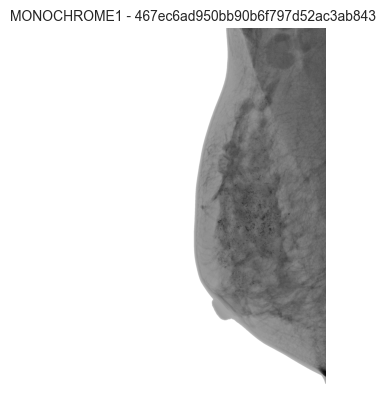

Mostrando imagen con Photometric Interpretation: MONOCHROME2, SOP Instance UID: 52b403c5c51efa04629aebd1629bd1a5


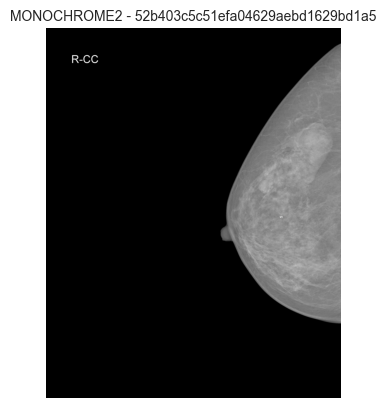

In [63]:
import os
import random
import pandas as pd
import pydicom
import matplotlib.pyplot as plt

# Ruta al CSV filtrado
filtered_csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/filtered_mass_calcifications.csv'

# Ruta a la carpeta de imágenes DICOM
dicom_root = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/original/Vindrmammo/images'

# Cargar el CSV filtrado
filtered_df = pd.read_csv(filtered_csv_path)

# Función para obtener la ruta del archivo DICOM usando SOP Instance UID
def get_dicom_path(sop_instance_uid):
    for study_id in os.listdir(dicom_root):
        study_path = os.path.join(dicom_root, study_id)
        if os.path.isdir(study_path):
            dicom_path = os.path.join(study_path, sop_instance_uid + '.dicom')
            if os.path.exists(dicom_path):
                return dicom_path
    raise FileNotFoundError(f"No se encontró el archivo DICOM para SOP Instance UID: {sop_instance_uid}")

# Función para mostrar una imagen DICOM
def show_dicom_image(dicom_path, title):
    dicom = pydicom.dcmread(dicom_path)
    image = dicom.pixel_array
    
    # Mostrar la imagen
    plt.imshow(image, cmap='gray')
    plt.title(title, fontsize=10)
    plt.axis('off')
    plt.show()

# Filtrar las imágenes por "Photometric Interpretation"
monochrome1_df = filtered_df[filtered_df['Photometric Interpretation'] == 'MONOCHROME1']
monochrome2_df = filtered_df[filtered_df['Photometric Interpretation'] == 'MONOCHROME2']

# Imprimir el total de cada valor
print(f"Total de imágenes con MONOCHROME1: {len(monochrome1_df)}")
print(f"Total de imágenes con MONOCHROME2: {len(monochrome2_df)}")

# Seleccionar una imagen al azar de cada tipo
monochrome1_row = monochrome1_df.sample(1).iloc[0]
monochrome2_row = monochrome2_df.sample(1).iloc[0]

# Obtener los SOP Instance UID correspondientes
monochrome1_sop_uid = monochrome1_row['SOP Instance UID']
monochrome2_sop_uid = monochrome2_row['SOP Instance UID']

# Obtener las rutas DICOM para las imágenes seleccionadas
monochrome1_dicom_path = get_dicom_path(monochrome1_sop_uid)
monochrome2_dicom_path = get_dicom_path(monochrome2_sop_uid)

# Mostrar las dos imágenes DICOM
print(f"Mostrando imagen con Photometric Interpretation: MONOCHROME1, SOP Instance UID: {monochrome1_sop_uid}")
show_dicom_image(monochrome1_dicom_path, f"MONOCHROME1 - {monochrome1_sop_uid}")

print(f"Mostrando imagen con Photometric Interpretation: MONOCHROME2, SOP Instance UID: {monochrome2_sop_uid}")
show_dicom_image(monochrome2_dicom_path, f"MONOCHROME2 - {monochrome2_sop_uid}")


Total de imágenes con MONOCHROME1: 232
Total de imágenes con MONOCHROME2: 1293
Mostrando imagen con Photometric Interpretation: MONOCHROME1, SOP Instance UID: 1e7ad5577c2f5e49294f9c3660968910


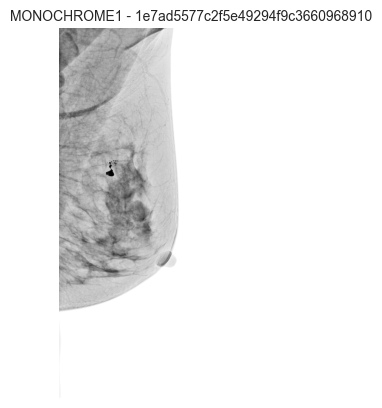

Mostrando imagen con Photometric Interpretation: MONOCHROME2, SOP Instance UID: 492dd7f17bc6af6fb657b874cadcd66a


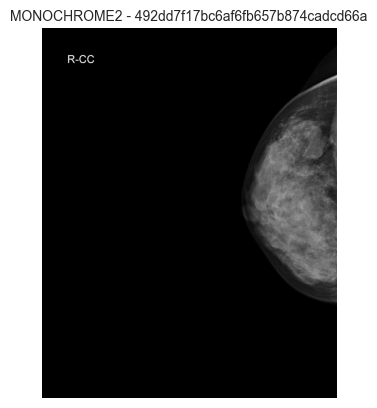

In [68]:
import os
import random
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
from pydicom.pixel_data_handlers.util import apply_voi_lut

# Ruta al CSV filtrado
filtered_csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/filtered_mass_calcifications.csv'

# Ruta a la carpeta de imágenes DICOM
dicom_root = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/original/Vindrmammo/images'

# Cargar el CSV filtrado
filtered_df = pd.read_csv(filtered_csv_path)

# Función para obtener la ruta del archivo DICOM usando SOP Instance UID
def get_dicom_path(sop_instance_uid):
    for study_id in os.listdir(dicom_root):
        study_path = os.path.join(dicom_root, study_id)
        if os.path.isdir(study_path):
            dicom_path = os.path.join(study_path, sop_instance_uid + '.dicom')
            if os.path.exists(dicom_path):
                return dicom_path
    raise FileNotFoundError(f"No se encontró el archivo DICOM para SOP Instance UID: {sop_instance_uid}")

# Función para mostrar una imagen DICOM con VOI LUT aplicado
def show_dicom_image_with_voi_lut(dicom_path, title):
    dicom = pydicom.dcmread(dicom_path)
    
    # Aplicar VOI LUT si está disponible
    if 'WindowCenter' in dicom and 'WindowWidth' in dicom:
        img = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        img = dicom.pixel_array
    
    # Mostrar la imagen
    plt.imshow(img, cmap='gray')
    plt.title(title, fontsize=10)
    plt.axis('off')
    plt.show()

# Filtrar las imágenes por "Photometric Interpretation"
monochrome1_df = filtered_df[filtered_df['Photometric Interpretation'] == 'MONOCHROME1']
monochrome2_df = filtered_df[filtered_df['Photometric Interpretation'] == 'MONOCHROME2']

# Imprimir el total de cada valor
print(f"Total de imágenes con MONOCHROME1: {len(monochrome1_df)}")
print(f"Total de imágenes con MONOCHROME2: {len(monochrome2_df)}")

# Seleccionar una imagen al azar de cada tipo
monochrome1_row = monochrome1_df.sample(1).iloc[0]
monochrome2_row = monochrome2_df.sample(1).iloc[0]

# Obtener los SOP Instance UID correspondientes
monochrome1_sop_uid = monochrome1_row['SOP Instance UID']
monochrome2_sop_uid = monochrome2_row['SOP Instance UID']

# Obtener las rutas DICOM para las imágenes seleccionadas
monochrome1_dicom_path = get_dicom_path(monochrome1_sop_uid)
monochrome2_dicom_path = get_dicom_path(monochrome2_sop_uid)

# Mostrar las dos imágenes DICOM con VOI LUT aplicado
print(f"Mostrando imagen con Photometric Interpretation: MONOCHROME1, SOP Instance UID: {monochrome1_sop_uid}")
show_dicom_image_with_voi_lut(monochrome1_dicom_path, f"MONOCHROME1 - {monochrome1_sop_uid}")

print(f"Mostrando imagen con Photometric Interpretation: MONOCHROME2, SOP Instance UID: {monochrome2_sop_uid}")
show_dicom_image_with_voi_lut(monochrome2_dicom_path, f"MONOCHROME2 - {monochrome2_sop_uid}")


In [75]:
### vamos a analizar cómo quedaron los recortes respecto a su bounding box

Carpeta: training/masas/benigno - 443 imágenes


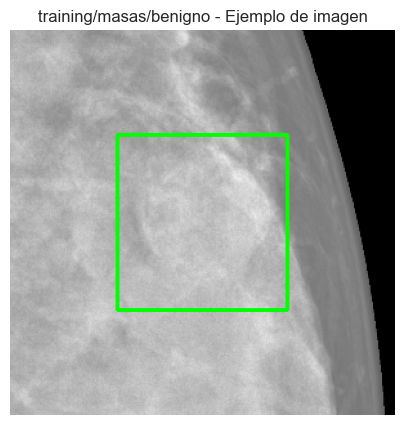

Carpeta: training/masas/maligno - 90 imágenes


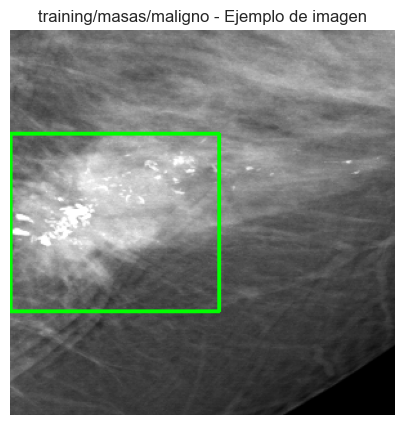

Carpeta: training/masas/sospechoso - 372 imágenes


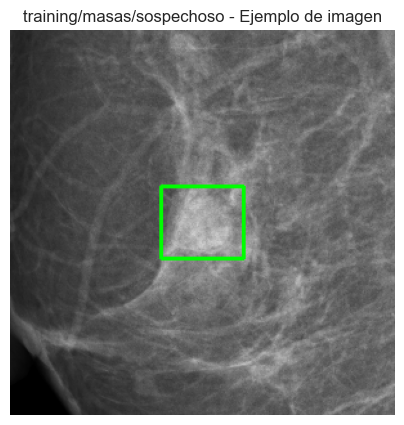

Carpeta: training/calcificaciones/benigno - 54 imágenes


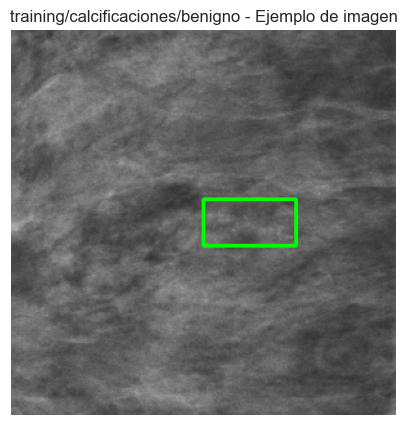

Carpeta: training/calcificaciones/maligno - 33 imágenes


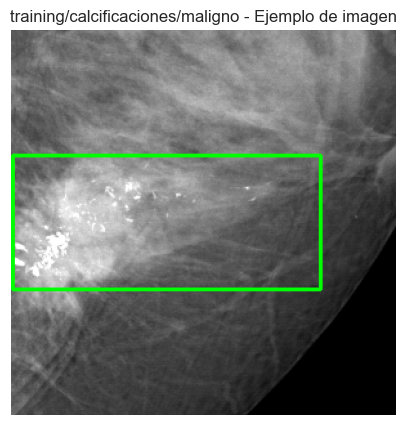

Carpeta: training/calcificaciones/sospechoso - 224 imágenes


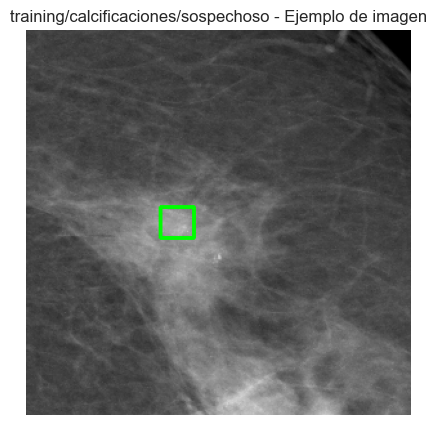

Carpeta: test/masas/benigno - 123 imágenes


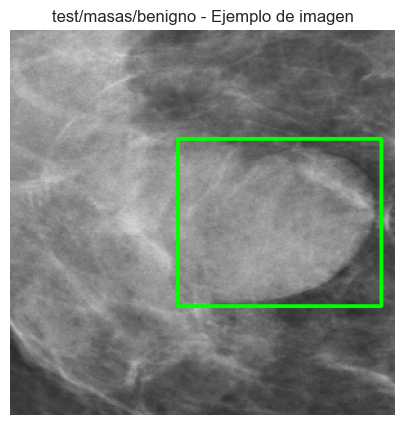

Carpeta: test/masas/maligno - 14 imágenes


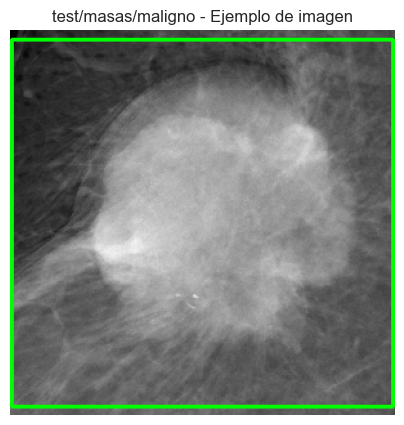

Carpeta: test/masas/sospechoso - 81 imágenes


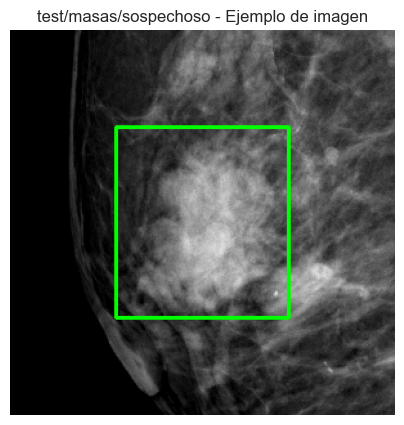

Carpeta: test/calcificaciones/benigno - 11 imágenes


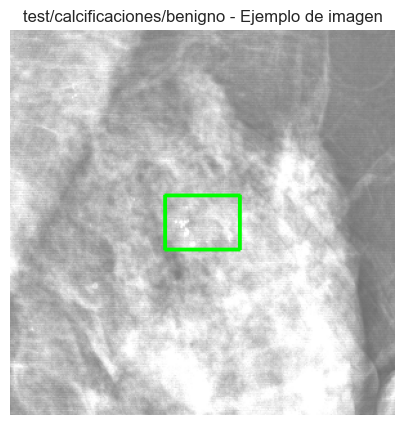

Carpeta: test/calcificaciones/maligno - 20 imágenes


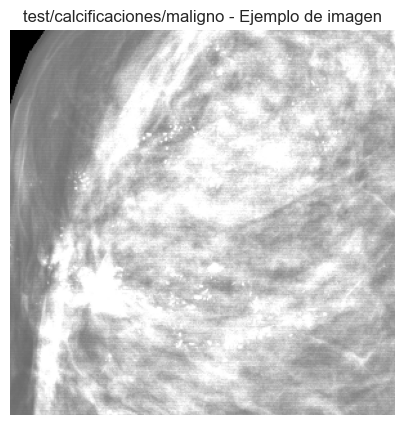

Carpeta: test/calcificaciones/sospechoso - 60 imágenes


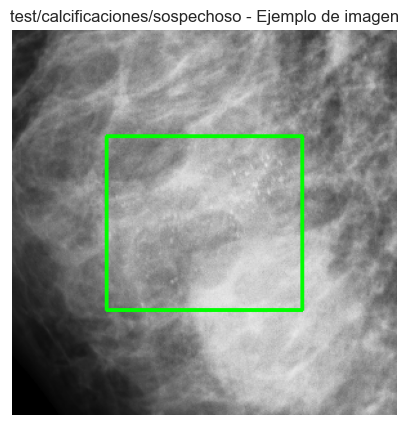

In [78]:
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Ruta principal donde están las carpetas de 'training' y 'test'
output_root = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/ROI_Training_Test'

# Ruta del CSV que contiene las coordenadas de los recortes (bounding boxes)
csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/recortes_de_masas_y_calcificaciones.csv'

# Cargar el CSV
df = pd.read_csv(csv_path)

# Función para dibujar el bounding box y mostrar la imagen
def mostrar_imagen_con_bb(image_path, xmin, ymin, xmax, ymax, title):
    # Cargar la imagen
    img = cv2.imread(image_path)

    # Dibujar el bounding box (BB) en la imagen
    img_bb = cv2.rectangle(img.copy(), (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)  # BB en verde

    # Convertir BGR a RGB para mostrar correctamente en matplotlib
    img_rgb = cv2.cvtColor(img_bb, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen con el bounding box
    plt.figure(figsize=(5, 5))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Función para contar imágenes en las subcarpetas y plotear una de cada una con su bounding box
def count_images_and_plot_example():
    for split in ['training', 'test']:
        split_path = os.path.join(output_root, split)
        if not os.path.exists(split_path):
            print(f"No se encontró la carpeta: {split_path}")
            continue

        for category in ['masas', 'calcificaciones']:
            category_path = os.path.join(split_path, category)

            for diagnosis in ['benigno', 'maligno', 'sospechoso']:
                diagnosis_path = os.path.join(category_path, diagnosis)

                if os.path.exists(diagnosis_path):
                    # Listar las imágenes en la carpeta
                    images = [f for f in os.listdir(diagnosis_path) if f.endswith('.png')]
                    num_images = len(images)

                    # Imprimir el conteo de imágenes
                    print(f"Carpeta: {split}/{category}/{diagnosis} - {num_images} imágenes")

                    if num_images > 0:
                        # Mostrar una imagen como ejemplo
                        image_name = images[0].replace('.png', '')  # Quitar la extensión para buscar en el CSV
                        image_path = os.path.join(diagnosis_path, images[0])

                        # Buscar las coordenadas del bounding box en el CSV
                        row = df[df['image_name'] == image_name]
                        if not row.empty:
                            xmin = int(row['xmin'].values[0])
                            ymin = int(row['ymin'].values[0])
                            xmax = int(row['xmax'].values[0])
                            ymax = int(row['ymax'].values[0])

                            # Mostrar la imagen con el bounding box
                            mostrar_imagen_con_bb(image_path, xmin, ymin, xmax, ymax, f"{split}/{category}/{diagnosis} - Ejemplo de imagen")
                        else:
                            print(f"No se encontraron coordenadas de BB para {image_name}")
                else:
                    print(f"No se encontró la carpeta: {diagnosis_path}")

# Ejecutar la función
count_images_and_plot_example()
